### Part 2

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Importing dataframes

In [2]:
# Path

path = r'C:\Users\suhas\Documents\cf\Instacart Data Analysis'

In [3]:

df_final_dataframe = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataframe_exercise_4_9.pkl'))

In [4]:
df_final_dataframe.shape

(32404859, 35)

In [5]:
df_final_dataframe.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,customers_current_order_count,order_days_of_week,...,first_name,surname,gender,state,age,date_joined,n_dependents,fam_status,income,merging_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
##### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<Axes: ylabel='Frequency'>

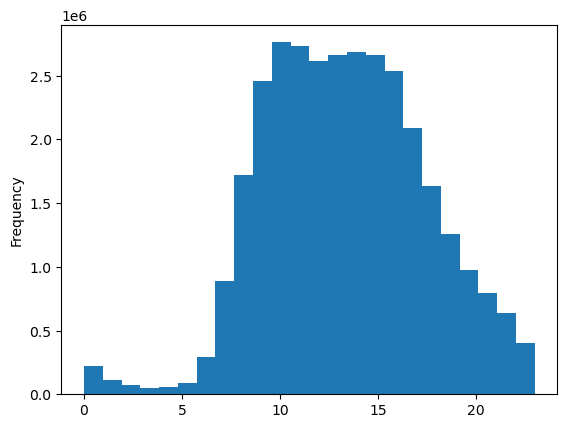

In [6]:
df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

##### The histogram shows that customer orders are placed throughout the entire day, but activity significantly increases starting around 7 AM. 

##### Order volume peaks between 10 AM and 3 PM. After 4 PM, there's a noticeable decline in order frequency as the night goes on.

##### Late morning / early afternoon are peak order season.

#### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<Axes: xlabel='loyalty_flag'>

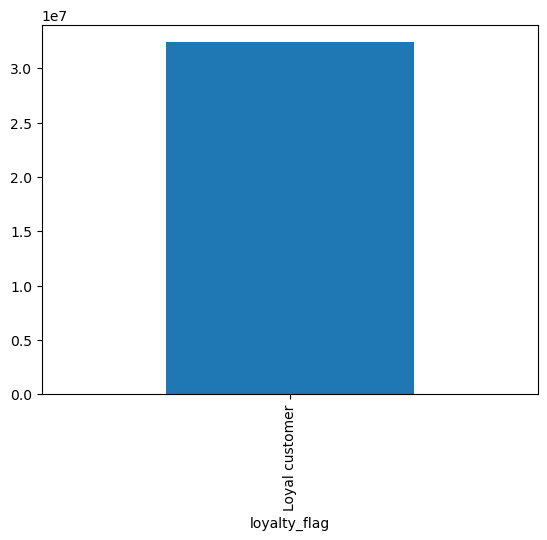

In [7]:
df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

#### This visualization shows how orders are distributed across the loyalty spectrum

##### <b>1)</b> 15,891,077 orders from regular customers (customers that order between 10 and 40 products)
##### <b>2)</b> 10,293,737 orders from loyal customers (customers that order more than 40 products)
##### <b>3)</b> 6,249,398 orders from new customers (customers that order less than 10 products)

In [8]:
df_final_dataframe['loyalty_flag'].value_counts()

loyalty_flag
Loyal customer    32404859
Name: count, dtype: int64

#### There are 206,209 unique users:

<Axes: xlabel='loyalty_flag'>

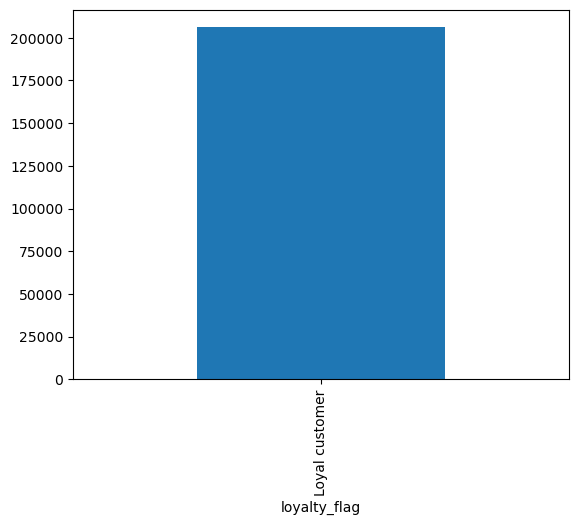

In [9]:

df_final_dataframe.drop_duplicates(subset='user_id')['loyalty_flag'].value_counts().plot(kind='bar')

In [10]:
df_final_dataframe.drop_duplicates(subset='user_id')['loyalty_flag'].value_counts()

loyalty_flag
Loyal customer    206209
Name: count, dtype: int64

#### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

#### Sampling

In [11]:
np.random.seed(4)

In [12]:
dev = np.random.rand(len(df_final_dataframe)) <= 0.7

In [13]:
big = df_final_dataframe[dev]

In [14]:
small = df_final_dataframe[~dev]

In [15]:
# Checking output:

len(big) + len(small)

32404859

In [16]:
# Storing the relevant columns in a variable

df_relevant_columns = small[['prices', 'order_hour_of_day']]

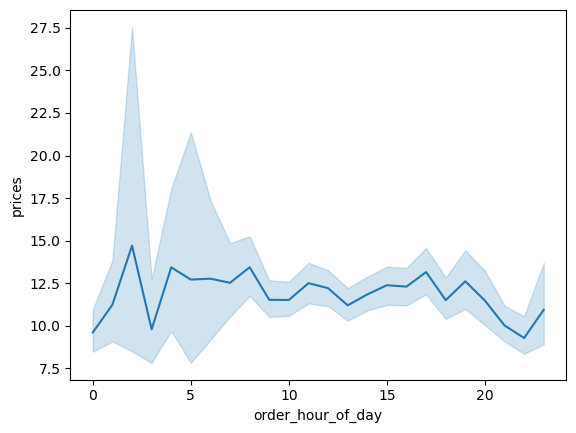

In [17]:
# Creating the line chart

line = sns.lineplot(data = df_relevant_columns, x = 'order_hour_of_day', y = 'prices')

#### Insights 

Is there a difference in expenditure depending on the hour of the day?
Yes.
00:00 – 05:00
High spending despite low order volume.
Possible reason: Late-night users may buy in bulk or choose pricier items.

07:00 – 10:00
Orders rise, but average spending drops.
Possible reason: Quick purchases during work hours.

10:00 onwards
Spending increases again.
Possible reason: Routine shoppers.

Opportunities
Promos (e.g., free delivery, discounts) between 5–10 am to boost sales.

##### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. 

##### First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

#### Sampling

In [18]:
np.random.seed(4)

In [19]:
dev_1 = np.random.rand(len(df_final_dataframe)) <= 0.7

In [20]:
big_1 = df_final_dataframe[dev_1]

In [21]:
small_1 = df_final_dataframe[~dev_1]

In [22]:
# Checking output

len(big_1) + len(small_1)

32404859

In [23]:
# Storing the relevant columns in a new var

df_relevant_columns_1 = small[['age', 'n_dependents']]

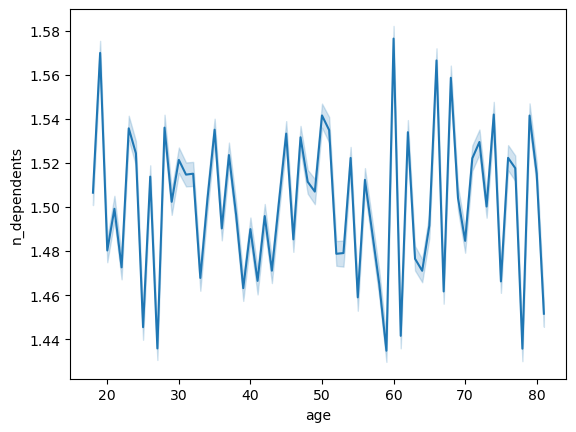

In [24]:
# Creating the line chart

line_2 = sns.lineplot(data = df_relevant_columns_1, x = 'age', y = 'n_dependents')

##### The line chart does not show any clear or consistent relationship between age and number of dependents. The data patterns randomly across all age groups, suggesting that age alone is not a strong predictor.
##### Suggestions:

##### Try with other variables (e.g. marital status, region) to see whether we can find some relationships or patterns, and create campaigns accodingly.

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

<Axes: xlabel='age', ylabel='income'>

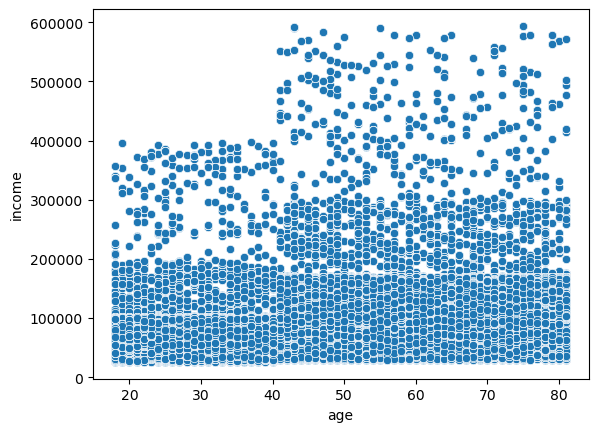

In [25]:
sns.scatterplot(x = 'age', y = 'income', data = df_final_dataframe)

##### The scatterplot shows that there's a great deal of unique income values. But there is no relationship gained from observing it.

#### Export your visualizations as “.png” files in your relevant project folder.

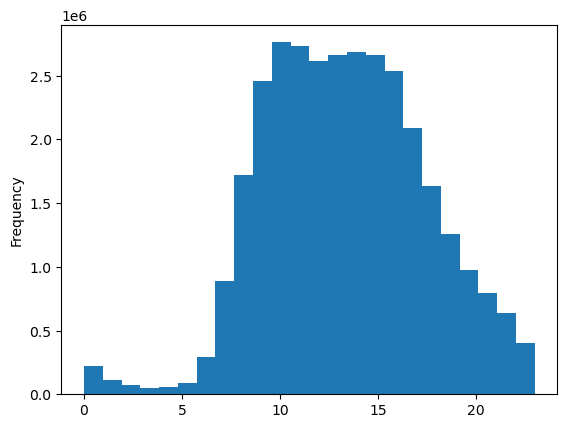

In [26]:
# Histogram

hist = df_final_dataframe['order_hour_of_day'].plot.hist(bins = 24)

In [28]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'histogram_order_hour_day.png'))

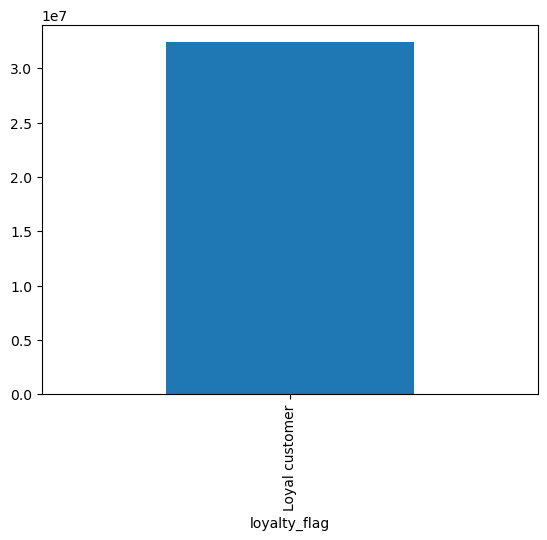

In [29]:
# Bar chart

bar = df_final_dataframe['loyalty_flag'].value_counts().plot.bar()

In [30]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'barchart_loyalty.png'))

In [31]:
# Line chart (step 5)
,
line.figure.savefig(os.path.join(path, '04 Analysis', 'line_prices_order_hour_day.png'))

In [32]:
# Line chart (step 6)

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'line_age_dependants.png'))

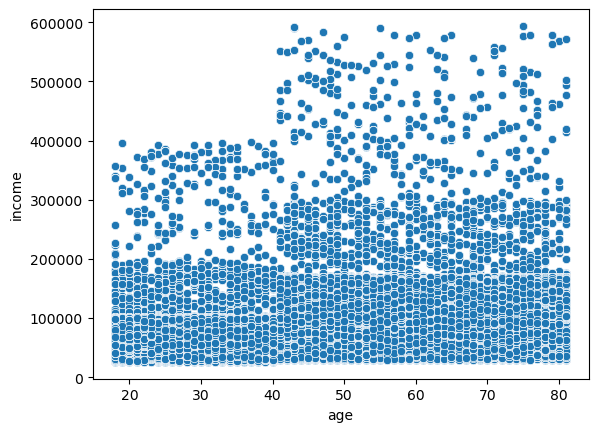

In [33]:
# Scatterplot

scat = sns.scatterplot(x = 'age', y = 'income', data = df_final_dataframe)

In [34]:
scat.figure.savefig(os.path.join(path, '04 Analysis', 'scat_age_income.png'))